In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("oecd_family.csv")
plt.rcParams['font.family'] = 'NanumGothicOTF'

#합계출산율(Total fertility rate) 추출
birth_rate = data.loc[(data.IND=='FAM1',['Country', 'Year','Value'])]

#2021년 이상 데이터 삭제
birth_rate = birth_rate.drop(birth_rate.loc[birth_rate.Year>=2021].index)

#인덱스 재정렬
birth_rate.index = range(0,len(birth_rate))

#한글화를 위한 리스트 생성
CountryName = ["이스라엘","룩셈부르크","네덜란드","그리스","아이슬란드","라트비아","슬로베니아","프랑스","폴란드","튀르키예","스페인","벨기에","멕시코","아일랜드","스위스","핀란드","칠레","캐나다","대한민국","뉴질랜드","오스트레일리아","헝가리","미국","영국","오스트리아","스웨덴","덴마크","슬로바키아","체코","콜롬비아","일본","노르웨이","코스타리카","리투아니아","독일","에스토니아","포르투갈","이탈리아"]

#영어이름을 한글로
for i in range(0,38):
    for j in range(0,9):
        birth_rate.loc[i*9:i*9+j,"Country"] = CountryName[i]
        
birth_rate2 = birth_rate.pivot(index='Country', columns='Year', values='Value')

birth_rate = birth_rate2.reindex(index=['대한민국', '이스라엘', '일본', '튀르키예', '캐나다', '멕시코',
                                         '미국', '칠레', '콜롬비아', '코스타리카', '오스트리아', '벨기에',
                                         '체코', '덴마크', '에스토니아', '핀란드', '프랑스', '독일', '그리스',
                                         '헝가리', '아이슬란드', '아일랜드', '이탈리아', '라트비아', '리투아니아',
                                         '룩셈부르크', '네덜란드', '노르웨이', '폴란드', '포르투갈', '슬로바키아',
                                         '슬로베니아', '스페인', '스웨덴', '스위스', '영국', '오스트레일리아', '뉴질랜드'])

birth_rate

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,
대한민국,1.30,1.19,1.21,1.24,1.17,1.05,0.98,0.92,0.84
이스라엘,3.05,3.03,3.08,3.09,3.11,3.11,3.09,3.01,2.90
일본,1.41,1.43,1.42,1.45,1.44,1.43,1.42,1.36,1.33
튀르키예,2.11,2.11,2.18,2.15,2.11,2.07,1.99,1.88,1.76
캐나다,1.61,1.59,1.58,1.56,1.54,1.50,1.50,1.47,1.50
멕시코,2.30,2.27,2.24,2.22,2.19,2.16,2.13,2.10,2.08
미국,1.88,1.86,1.86,1.84,1.82,1.77,1.73,1.71,1.64
칠레,1.85,1.82,1.79,1.75,1.71,1.68,1.65,1.63,1.61
콜롬비아,1.93,1.91,1.88,1.86,1.84,1.83,1.81,1.79,1.77


In [6]:
inequality = pd.read_csv("sex_inequality.csv")
inequality

inequality = inequality.set_index('국가별')
inequality

,대륙,2012,2013,2014,2015,2016,2017,2018,2019,2020
국가별,,,,,,,,,,
대한민국,아시아,0.108,0.108,0.100,0.096,0.086,0.080,0.078,0.078,0.070
이스라엘,아시아,0.131,0.117,0.114,0.104,0.101,0.094,0.089,0.098,0.084
일본,아시아,0.124,0.125,0.124,0.115,0.102,0.093,0.087,0.080,0.082
튀르키예,아시아,0.370,0.354,0.346,0.335,0.323,0.311,0.286,0.277,0.277
캐나다,북아메리카,0.120,0.115,0.109,0.103,0.087,0.083,0.073,0.069,0.070
멕시코,북아메리카,0.377,0.371,0.366,0.349,0.341,0.336,0.323,0.317,0.317
미국,북아메리카,0.235,0.229,0.217,0.219,0.216,0.209,0.192,0.189,0.178
칠레,남아메리카,0.320,0.300,0.288,0.277,0.259,0.243,0.207,0.206,0.210
콜롬비아,남아메리카,0.462,0.460,0.433,0.430,0.427,0.427,0.427,0.423,0.425


findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.


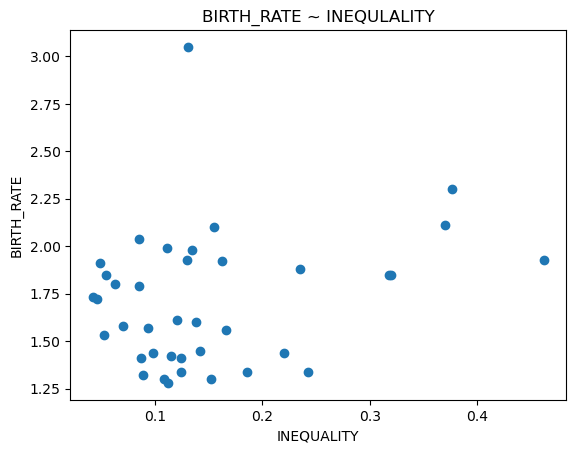

In [7]:
X_2012 = inequality['2012']
Y_2012 = birth_rate[2012]

plt.scatter(X_2012,Y_2012)
plt.title('BIRTH_RATE ~ INEQULALITY')
plt.xlabel('INEQUALITY')
plt.ylabel('BIRTH_RATE')
plt.show()

In [8]:
cov_2012 = (np.sum(X_2012 * Y_2012) - len(X_2012)*np.mean(X_2012)*np.mean(Y_2012)) / len(X_2012)
print(cov_2012)

#2012 출산율과 성불평등의 관계는 약한 양의 상관관계이다.
corr_2012 = cov_2012 / (np.std(X_2012) * np.std(Y_2012))
print(corr_2012)

0.008715990304709119
0.25063231993712926


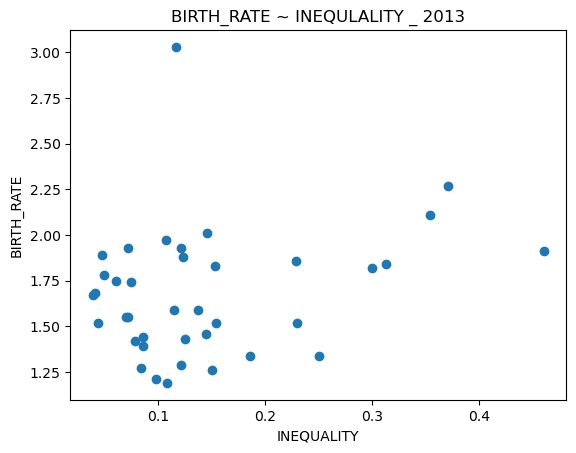

In [13]:
X_2013 = inequality['2013']
Y_2013 = birth_rate[2013]

plt.scatter(X_2013,Y_2013)
plt.title('BIRTH_RATE ~ INEQULALITY _ 2013')
plt.xlabel('INEQUALITY')
plt.ylabel('BIRTH_RATE')
plt.show()

In [14]:
cov_2013 = (np.sum(X_2013*Y_2013) - len(X_2013)*np.mean(X_2013)*np.mean(Y_2013)) / len(X_2013)
print(cov_2013)

#2013 출산율과 성불평등의 관계는 약한 양의 상관관계이다.
corr_2013 = cov_2013 / (np.std(X_2013) * np.std(Y_2013))
print(corr_2013)

0.00907270083102482
0.2629856260214246


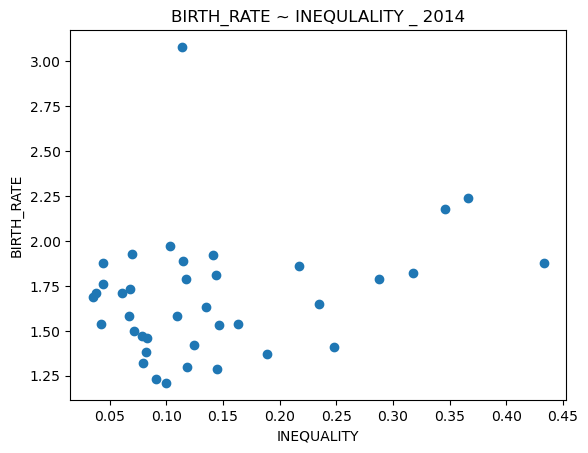

In [15]:
X_2014 = inequality['2014']
Y_2014 = birth_rate[2014]

plt.scatter(X_2014,Y_2014)
plt.title('BIRTH_RATE ~ INEQULALITY _ 2014')
plt.xlabel('INEQUALITY')
plt.ylabel('BIRTH_RATE')
plt.show()

In [16]:
cov_2014 = (np.sum(X_2014*Y_2014) - len(X_2014)*np.mean(X_2014)*np.mean(Y_2014)) / len(X_2014)
print(cov_2014)

#2014 출산율과 성불평등의 관계는 약한 양의 상관관계이다.
corr_2014 = cov_2014 / (np.std(X_2014) * np.std(Y_2014))
print(corr_2014)

0.008846322714681542
0.26835509312909117


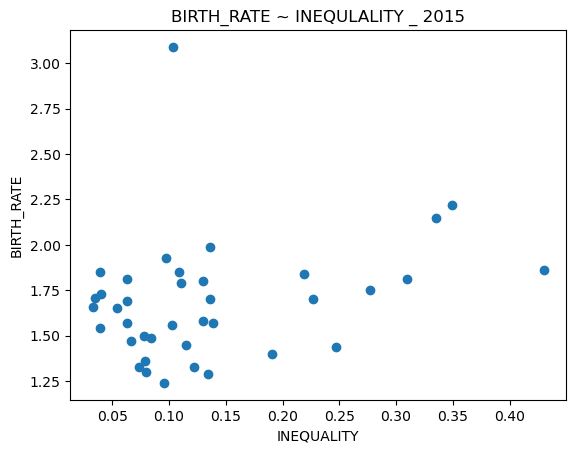

In [17]:
X_2015 = inequality['2015']
Y_2015 = birth_rate[2015]

plt.scatter(X_2015,Y_2015)
plt.title('BIRTH_RATE ~ INEQULALITY _ 2015')
plt.xlabel('INEQUALITY')
plt.ylabel('BIRTH_RATE')
plt.show()

In [18]:
cov_2015 = (np.sum(X_2015*Y_2015) - len(X_2015)*np.mean(X_2015)*np.mean(Y_2015)) / len(X_2015)
print(cov_2015)

#2015 출산율과 성불평등의 관계는 약한 양의 상관관계이다.
corr_2015 = cov_2015 / (np.std(X_2015) * np.std(Y_2015))
print(corr_2015)

0.008530955678670418
0.27143829762209987


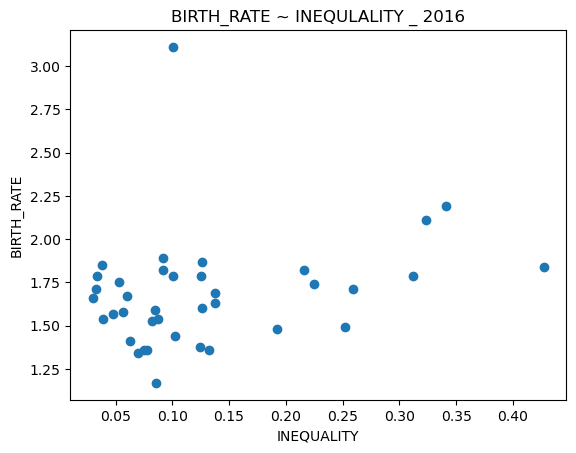

In [19]:
X_2016 = inequality['2016']
Y_2016 = birth_rate[2016]

plt.scatter(X_2016,Y_2016)
plt.title('BIRTH_RATE ~ INEQULALITY _ 2016')
plt.xlabel('INEQUALITY')
plt.ylabel('BIRTH_RATE')
plt.show()

In [20]:
cov_2016 = (np.sum(X_2016*Y_2016) - len(X_2016)*np.mean(X_2016)*np.mean(Y_2016)) / len(X_2016)
print(cov_2016)

#2016 출산율과 성불평등의 관계는 약한 양의 상관관계이다.
corr_2016 = cov_2016 / (np.std(X_2016) * np.std(Y_2016))
print(corr_2016)

0.007958171745152395
0.26187846678104626


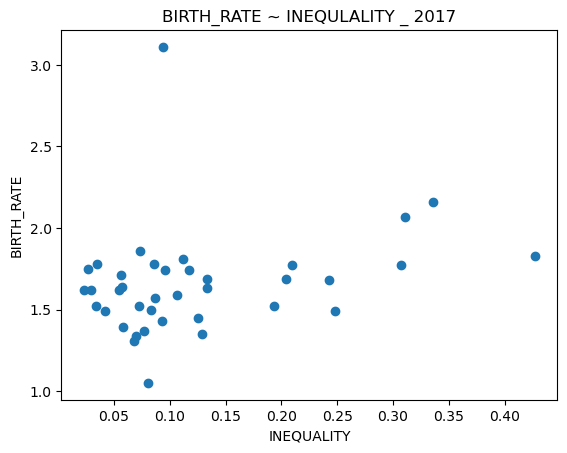

In [21]:
X_2017 = inequality['2017']
Y_2017 = birth_rate[2017]

plt.scatter(X_2017,Y_2017)
plt.title('BIRTH_RATE ~ INEQULALITY _ 2017')
plt.xlabel('INEQUALITY')
plt.ylabel('BIRTH_RATE')
plt.show()

In [22]:
cov_2017 = (np.sum(X_2017*Y_2017) - len(X_2017)*np.mean(X_2017)*np.mean(Y_2017)) / len(X_2017)
print(cov_2017)

#2017 출산율과 성불평등의 관계는 약한 양의 상관관계이다.
corr_2017 = cov_2017 / (np.std(X_2017) * np.std(Y_2017))
print(corr_2017)

0.008146509695290849
0.26993809756306325


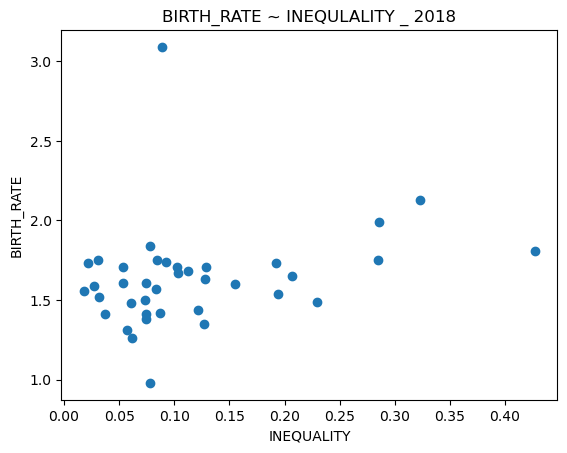

In [23]:
X_2018 = inequality['2018']
Y_2018 = birth_rate[2018]

plt.scatter(X_2018,Y_2018)
plt.title('BIRTH_RATE ~ INEQULALITY _ 2018')
plt.xlabel('INEQUALITY')
plt.ylabel('BIRTH_RATE')
plt.show()

In [24]:
cov_2018 = (np.sum(X_2018*Y_2018) - len(X_2018)*np.mean(X_2018)*np.mean(Y_2018)) / len(X_2018)
print(cov_2018)

#2018 출산율과 성불평등의 관계는 약한 양의 상관관계이다.
corr_2018 = cov_2018 / (np.std(X_2018) * np.std(Y_2018))
print(corr_2018)

0.007556717451523525
0.26576406908339834


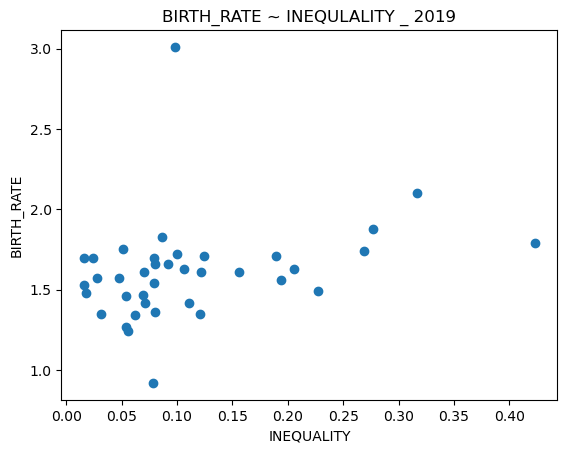

In [25]:
X_2019 = inequality['2019']
Y_2019 = birth_rate[2019]

plt.scatter(X_2019,Y_2019)
plt.title('BIRTH_RATE ~ INEQULALITY _ 2019')
plt.xlabel('INEQUALITY')
plt.ylabel('BIRTH_RATE')
plt.show()

In [26]:
cov_2019 = (np.sum(X_2019*Y_2019) - len(X_2019)*np.mean(X_2019)*np.mean(Y_2019)) / len(X_2019)
print(cov_2019)

#2019 출산율과 성불평등의 관계는 약한 양의 상관관계이다.
corr_2019 = cov_2019 / (np.std(X_2019) * np.std(Y_2019))
print(corr_2019)

0.008206620498614882
0.2953314251716918


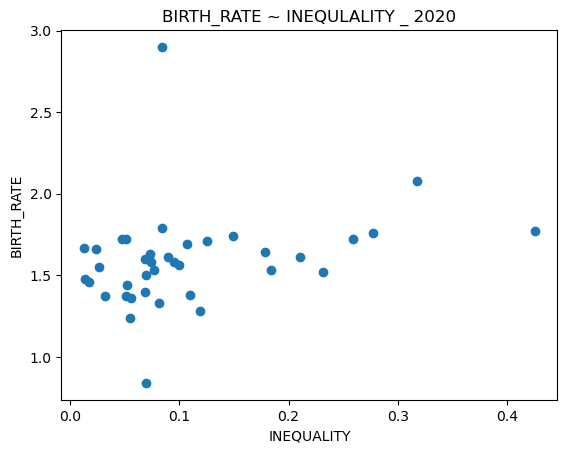

In [27]:
X_2020 = inequality['2020']
Y_2020 = birth_rate[2020]

plt.scatter(X_2020,Y_2020)
plt.title('BIRTH_RATE ~ INEQULALITY _ 2020')
plt.xlabel('INEQUALITY')
plt.ylabel('BIRTH_RATE')
plt.show()

In [28]:
cov_2020 = (np.sum(X_2020*Y_2020) - len(X_2020)*np.mean(X_2020)*np.mean(Y_2020)) / len(X_2020)
print(cov_2020)

#2020 출산율과 성불평등의 관계는 약한 양의 상관관계이다.
corr_2020 = cov_2020 / (np.std(X_2020) * np.std(Y_2020))
print(corr_2020)

0.0073595013850416
0.27572336473693687


In [29]:
corr_result = pd.DataFrame({'Year':[2012,2013,2014,2015,2016,2017,2018,2019,2020],
                           'corr':[corr_2012,corr_2013,corr_2014,corr_2015,corr_2016,corr_2017,corr_2018,corr_2019,corr_2020]})
corr_result

,Year,corr
0,2012,0.250632
1,2013,0.262986
2,2014,0.268355
3,2015,0.271438
4,2016,0.261878
5,2017,0.269938
6,2018,0.265764
7,2019,0.295331
8,2020,0.275723


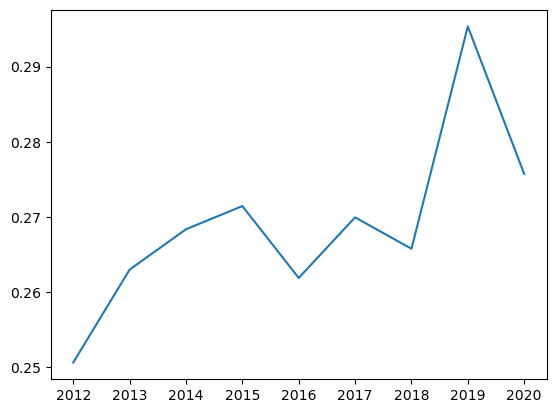

In [30]:
#년도별 상관계수 변화

plt.plot(corr_result['Year'],corr_result['corr'])
plt.show()

In [35]:
import scipy.stats as stats

print(stats.pearsonr(X_2012,Y_2012))
print(stats.pearsonr(X_2013,Y_2013))
print(stats.pearsonr(X_2014,Y_2014))
print(stats.pearsonr(X_2015,Y_2015))
print(stats.pearsonr(X_2016,Y_2016))
print(stats.pearsonr(X_2017,Y_2017))
print(stats.pearsonr(X_2018,Y_2018))
print(stats.pearsonr(X_2019,Y_2019))
print(stats.pearsonr(X_2020,Y_2020))

(0.25063231993712987, 0.12908199127318515)
(0.262985626021428, 0.11066278445466983)
(0.2683550931290882, 0.10330693894787425)
(0.271438297622098, 0.09925480615262115)
(0.2618784667810448, 0.11222758071717678)
(0.26993809756306364, 0.10121101525006926)
(0.26576406908339917, 0.10680857293962279)
(0.29533142517169464, 0.07184146378206499)
(0.27572336473693504, 0.09382620969125634)
